In [9]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *

The data sets we have been using have been very standardised, and are very unrelaistic to data sets seen in real world applications,
different sizes,
different aspect ratios,
subject in different parts of the image,
potentialy even multiple examples,


ImageGenerator 

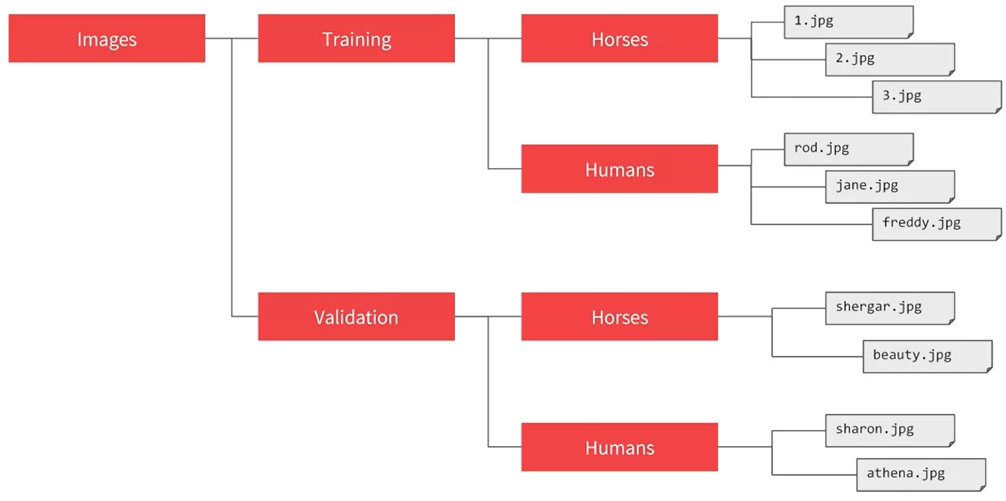

In [2]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

point it at the directory, subdirecotry of that will generate labels for you.
they wil be loaded and geenrated correctly 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# instantiate image generator and normalizes pixel values
train_datagen = ImageDataGenerator(rescale=1./255) 
# gets it to load images from the directory and subdirecotry 
# always point it to the directory that contains the subdirectory which contain the images

train_generator = train_datagen.flow_from_directory(train_directory, 
                                                    target_size=(300,300), # resizes images consistent
                                                    batch_size=128, # batches for optimizer
                                                    class_mode='binary') # kind of classification

In [ ]:
# exactly the same as the test, except pointing to the validation direcotry 
validation_generator = train_datagen.flow_from_directory(validation_directory, 
                                                    target_size=(300,300), # resizes images consistent
                                                    batch_size=128, # batches for optimizer
                                                    class_mode='binary') # kind of classification

In [5]:
# slight modifications since we are using generators and larger and more complex images
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)), # 3 channels this time
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'), # filter number increasing, image is increasingly compressed
    MaxPooling2D(2,2), # the greater number of convolutions is due to the greater size and complexity
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid') # sigmid single unit as its binary classification 
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [8]:
model.compile(loss='binary_crossentropy', # instead of sparse cross entropry
             optimizer=RMSprop(lr=0.001), # could use adam also 
             metrics=['acc'])

In [ ]:
# instead of model.fit ,its model,fit_generator

history = model.fit_generator(train_generator, # set up earlier, streams images form directory
                             steps_per_epoch=8, # number of batches per epoch
                             epochs=15, 
                             validation_data=validation_generator, # specify vaifdation set
                             validation_steps=8, # batches of 32
                             verbose=2) # how much to dispaly while training going on 

you can add validation into the training loop by specifiying some validation images. then tnesorflow can meansure efecitvemess with that set.

now at the end of every epoch, not only is the accuracy of the training set printed, but also its performance on the validation set.

you will expect slightly worse perforance on validation set - however too much and your algorithm is underfitting the data

In [ ]:
# what happens if we compress the data
train_generator = train_datagen.flow_from_directory(train_directory, 
                                                    target_size=(150,150), # images are now compressed
                                                    batch_size=128, # batches for optimizer
                                                    class_mode='binary') # kind of classification


In [ ]:
#useful bit of code:

img = image.load_img(path, target_size=(150,150))
img_array = image.img_to_array(img)

the Conv net we will use will have a few fewer convolutionary layers - they would be uncessary. 
this will allow the speed of training to go up.

the accuracy will also go down

# Assignment

In [1]:
training_directory = r'C:\Users\44788\Desktop\OctaveML\happy_sad'

In [16]:
def train_happy_sad_model(training_directory):
    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
         def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>DESIRED_ACCURACY): 
                print("\n Reached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True 

    callbacks = myCallback()
    
    model = tf.keras.models.Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
        MaxPooling2D(2,2),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=0.001), 
             metrics=['acc'])

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1./255) 

    train_generator = train_datagen.flow_from_directory(training_directory, 
                                                    target_size=(150,150), 
                                                    batch_size=40, 
                                                    class_mode='binary') 

    history = model.fit_generator(train_generator, steps_per_epoch=1, epochs=5)
    
    return history.history['acc'][-1]

In [17]:
train_happy_sad_model(training_directory)

Found 80 images belonging to 2 classes.
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6921 - acc: 0.4750
Epoch 2/5
1/1 [==============================] - 0s 82ms/step - loss: 2.5999 - acc: 0.5500
Epoch 3/5
1/1 [==============================] - 0s 81ms/step - loss: 3.3620 - acc: 0.3750
Epoch 4/5
1/1 [==============================] - 0s 83ms/step - loss: 0.5894 - acc: 0.4000
Epoch 5/5
1/1 [==============================] - 0s 82ms/step - loss: 0.4293 - acc: 0.7500


0.75